# Analysis on data extracted from audios

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
os.chdir('/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis')

In [62]:
all_data = pd.read_csv('NLP/Data/SpontaneousDialogue/All_Data.csv')
all_data

,target,Audio path,participant,interviewer,Total Words,Vb Rate,Verbs,CmN rate,Common Nouns,PpN Rate,Proper Nouns,FlR,Filler Words
0,0,NLP/Data/SpontaneousDialogue/HC/ID19_hc_0_0_0.wav,Thank you. This was great. Now let's continue ...,"Well, there are so many nice buildings. Get yo...",101,0.129,13,0.109,11,0.059,6,0.000,0
1,0,NLP/Data/SpontaneousDialogue/HC/ID09_hc_0_0_0.wav,"No problem. Okay, so in London, there are lots...",Great. Thank you. Now we try the open dialogue...,347,0.156,54,0.141,49,0.052,18,0.020,7
2,0,NLP/Data/SpontaneousDialogue/HC/ID08_hc_0_0_0.wav,"Okay, great. Thank you. Okay. Okay. Yeah. Okay...",NaN,242,0.136,33,0.107,26,0.083,20,0.012,3
3,0,NLP/Data/SpontaneousDialogue/HC/ID10_hc_0_0_0.wav,"Yeah, I have finished reading. Yeah. Okay. Mos...",Yeah. Thank you. Let's try the spontaneous dia...,247,0.166,41,0.109,27,0.053,13,0.028,7
4,0,NLP/Data/SpontaneousDialogue/HC/ID05_hc_0_0_0.wav,"So I would go and see the Tower of London, whi...","Thank you. Great. Okay, let's continue with th...",225,0.124,28,0.107,24,0.058,13,0.049,11
5,0,NLP/Data/SpontaneousDialogue/HC/ID26_hc_0_0_0.wav,"Okay. Okay, well, I definitely think you shoul...","Great. Thank you. Next, I'd like to try to hav...",240,0.150,36,0.133,32,0.071,17,0.021,5
6,0,NLP/Data/SpontaneousDialogue/HC/ID21_hc_0_0_0.wav,Okay. I think it's good to have a walk along b...,"Okay, that sounds great. Would she recommend t...",188,0.154,29,0.144,27,0.048,9,0.043,8
7,0,NLP/Data/SpontaneousDialogue/HC/ID03_hc_0_0_0.wav,Okay. So I'm not very londoner here. I came he...,Thank you very much. This was great. Now let's...,173,0.133,23,0.075,13,0.116,20,0.017,3
8,0,NLP/Data/SpontaneousDialogue/HC/ID11_hc_0_0_0.wav,"What are you interested in? Oh, then central L...",Great. Thank you. Let's try to have the sponta...,175,0.114,20,0.137,24,0.131,23,0.006,1
9,0,NLP/Data/SpontaneousDialogue/HC/ID35_hc_0_0_0.wav,Thank you. This was really great. I would like...,Okay. Okay. Some places? Yeah. Can you repeat ...,72,0.181,13,0.125,9,0.056,4,0.014,1


In [64]:
params = ['Verbs', 'Vb Rate', 'Common Nouns', 'CmN rate', 'Proper Nouns', 'PpN Rate', 'Filler Words', 'FlR', 'Total Words']

/var/folders/02/s2pnfmx100v3128rbky3w3mr0000gn/T/ipykernel_92966/507451400.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=all_data, x='target', y=column, ci="sd")
/var/folders/02/s2pnfmx100v3128rbky3w3mr0000gn/T/ipykernel_92966/507451400.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=all_data, x='target', y=column, ci="sd")
/var/folders/02/s2pnfmx100v3128rbky3w3mr0000gn/T/ipykernel_92966/507451400.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=all_data, x='target', y=column, ci="sd")
/var/folders/02/s2pnfmx100v3128rbky3w3mr0000gn/T/ipykernel_92966/507451400.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=all_data, x='target', y=column, ci="sd")
/var/folders/02/s2pnfmx100v3128rbky3w3mr0000gn/T/ipykernel_92966

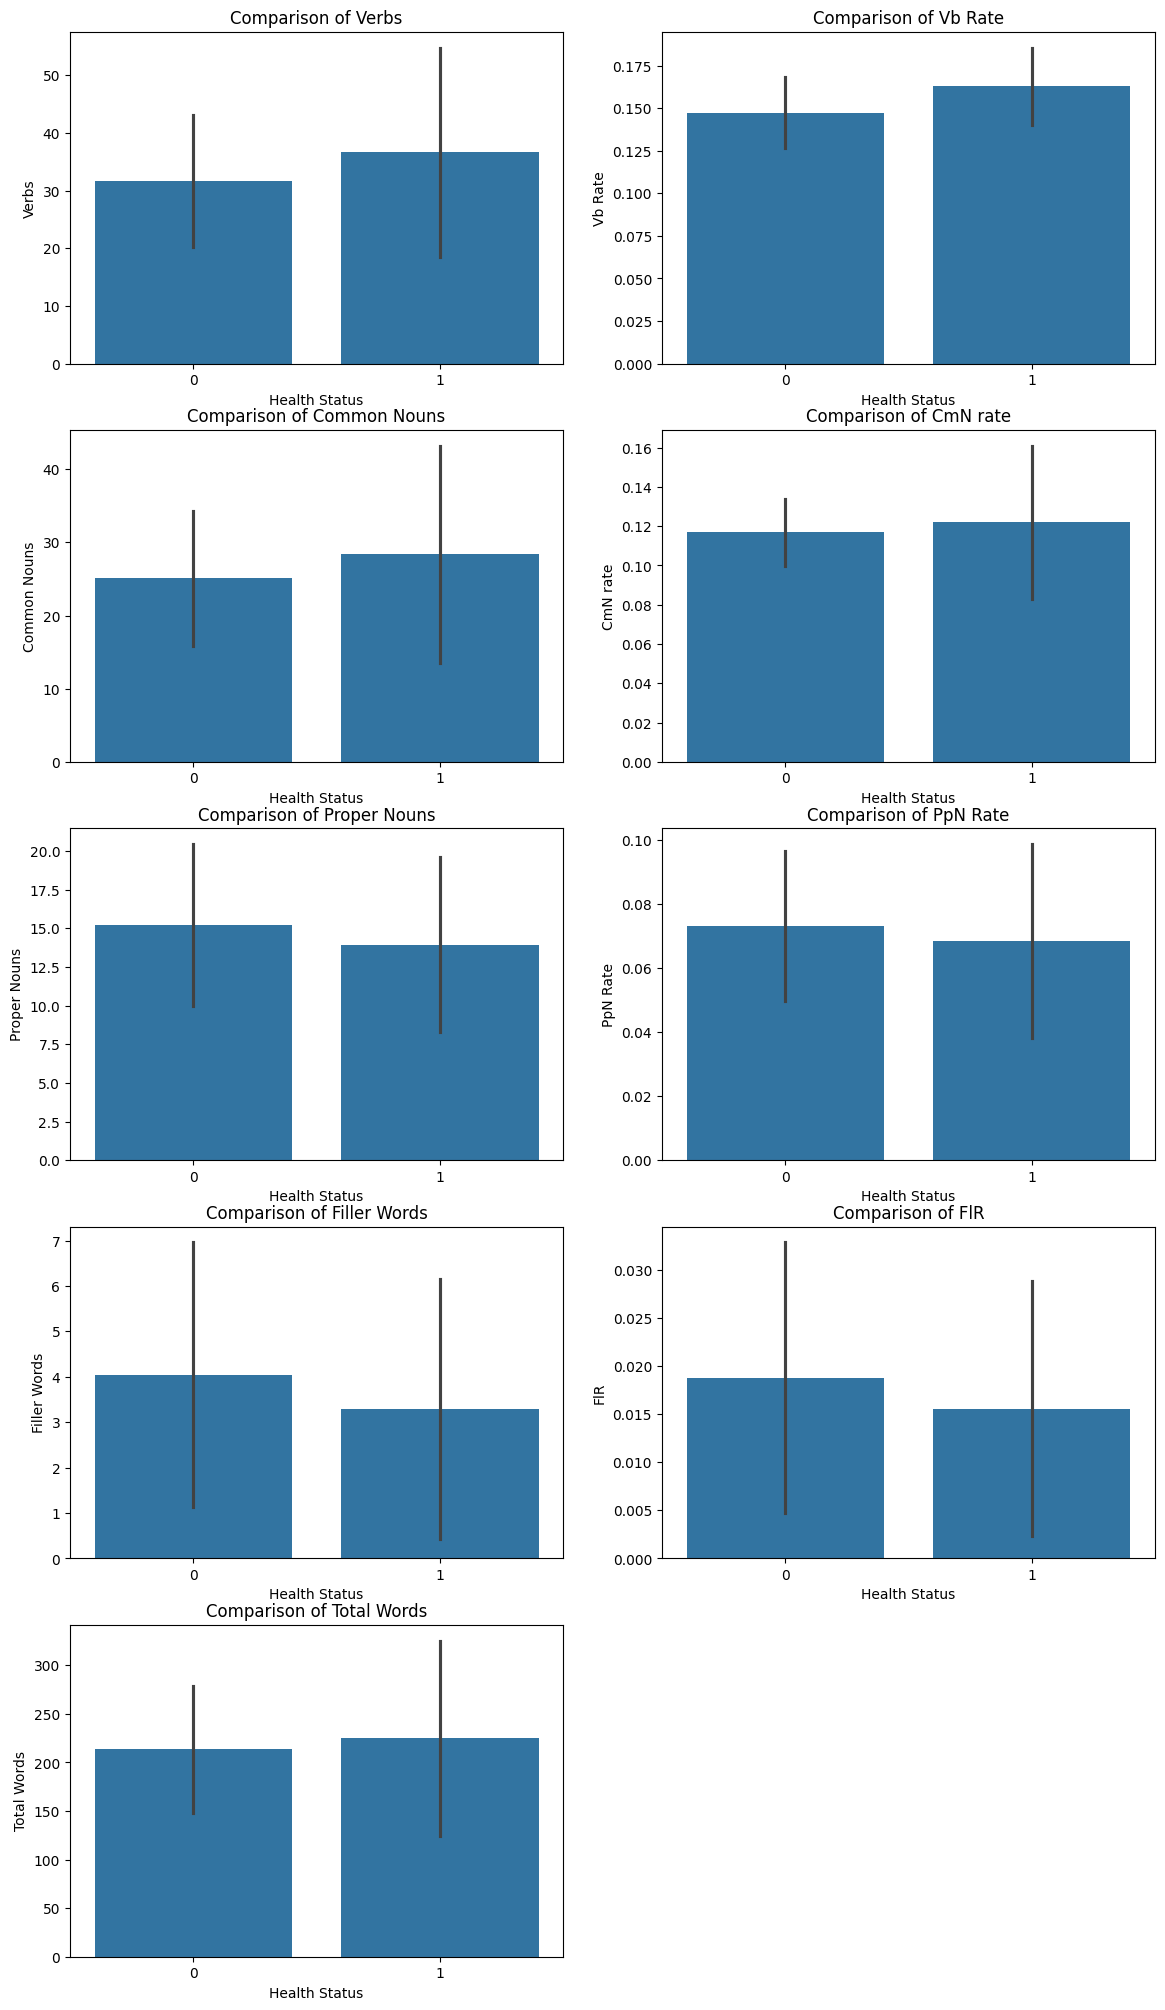

In [63]:
plt.figure(figsize=(14, 25))
for i, column in enumerate(params, 1):
    plt.subplot(5, 2, i)
    sns.barplot(data=all_data, x='target', y=column, ci="sd")  
    plt.title(f'Comparison of {column.replace("_", " ")}')
    plt.ylabel(column.replace("_", " "))
    plt.xlabel('Health Status')

## Run with org dataset

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = all_data[['FlR','PpN Rate', 'Vb Rate', 'CmN rate']]
y = all_data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred=y_pred, y_true= y_test)

print(y_test)
print('pred: ', y_pred, '; accuracy:', accuracy)

15    0
19    0
27    1
26    1
Name: target, dtype: int64
pred:  [0 0 0 1] ; accuracy: 0.75


### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred=y_pred, y_true= y_test)

print('pred: ', y_pred, '; accuracy:', accuracy)

pred:  [0 1 1 1 1 1] ; accuracy: 0.6666666666666666


## Run with duplciates dataset

In [43]:
all_data_duplicates = pd.read_csv('NLP/Data/SpontaneousDialogue/All_Data_Duplicates.csv')
all_data_duplicates

X = all_data_duplicates[['FlR','PpN Rate', 'Vb Rate', 'CmN rate']]
y = all_data_duplicates['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

### Random Forest

In [23]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred=y_pred, y_true= y_test)

print(y_test)
print('pred: ', y_pred, '; accuracy:', accuracy)

30     1
67     1
62     1
47     0
42     0
40     0
90     1
45     0
10     0
0      0
18     0
31     1
97     1
85     0
76     0
4      0
79     0
33     1
12     0
26     1
100    1
Name: target, dtype: int64
pred:  [0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0] ; accuracy: 0.7619047619047619


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred=y_pred, y_true= y_test)

#print(y_test)
print('pred: ', y_pred, '; accuracy:', accuracy)

#clf.score(X_train, y_train)

pred:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ; accuracy: 0.5714285714285714


### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred=y_pred, y_true= y_test)

print('pred: ', y_pred, '; accuracy:', accuracy)

pred:  [1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0] ; accuracy: 1.0


## Run with 1 duplicate

In [59]:
all_data_duplicates_1Dup = pd.read_csv('NLP/Data/SpontaneousDialogue/All_Data_1Dup.csv')

X = all_data_duplicates[['FlR','PpN Rate', 'Vb Rate', 'CmN rate']]
y = all_data_duplicates['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred=y_pred, y_true= y_test)

print('pred: ', y_pred, '; accuracy:', accuracy)

pred:  [0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 0] ; accuracy: 0.7804878048780488


* Notes:
    * Tree based algorithms are more accurate when dataset size is small.

## Predicting indexes

### Torch nn

In [127]:
import torch.nn as nn
import torch.optim as optim
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
 
model = nn.Sequential(
    nn.Linear(4, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 1) # Have to change with input amount
)
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# train-test split of the dataset
all_data_duplicates_1Dup_IndexesIncluded = pd.read_csv('NLP/Data/SpontaneousDialogue/All_Data_1Dup_IndexesIncluded_1.csv')

X = all_data_duplicates_1Dup_IndexesIncluded[['FlR','PpN Rate', 'Vb Rate', 'CmN rate']]
y = all_data_duplicates_1Dup_IndexesIncluded[['H&Y']] # ,'UPDRS II-5','UPDRS III-18'

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, shuffle=True)

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X.values, dtype=torch.float32) # X_test
y_test = torch.tensor(y.values, dtype=torch.float32).reshape(-1, 1) # Have to change with input amount

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
 
# training parameters
n_epochs = 230   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            end = min(start + batch_size, len(X_train))
            # take a batch
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    #print(y_test, y_pred)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 0.40
RMSE: 0.63


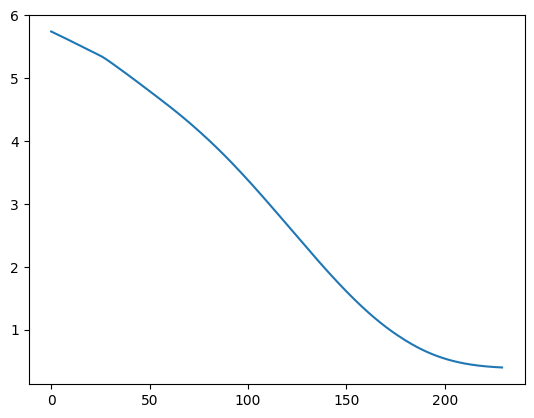

In [128]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [129]:
model.eval()
y_pred = model(X_test)
y_pred = y_pred.detach().numpy()
#y_test = y_test.detach().numpy()

df = pd.DataFrame(y_pred, columns=['H&Y']) #,'UPDRS II-5','UPDRS III-18'
df1 = pd.DataFrame(y_test, columns=['H&Y']) #,'UPDRS II-5','UPDRS III-18'

df_all = pd.concat([df, df1], axis = 1)

pd.set_option('display.max_rows', 100)
df_all

,H&Y,H&Y
0,2.446902,3.0
1,2.456468,2.0
2,2.462366,3.0
3,2.468839,4.0
4,2.463896,2.0
5,2.444918,3.0
6,2.488027,3.0
7,2.444974,2.0
8,2.496401,2.0
9,2.444604,3.0


1. Tried Regression on all data inlcuding the health people
-> 2. only on the patient data
-> Classification instead of regression?

Instead of predicting three at the time -> predict one index

Changing epoch to mitigate error -> conclusion: still not accurate, classification